In [8]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
d=pd.read_csv(r'C:\Users\DELL\Downloads\zoo.csv')

In [9]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [12]:
import numpy as np
labels=d['class_type']
print(np.unique(labels.values))




[1 2 3 4 5 6 7]


<AxesSubplot: >

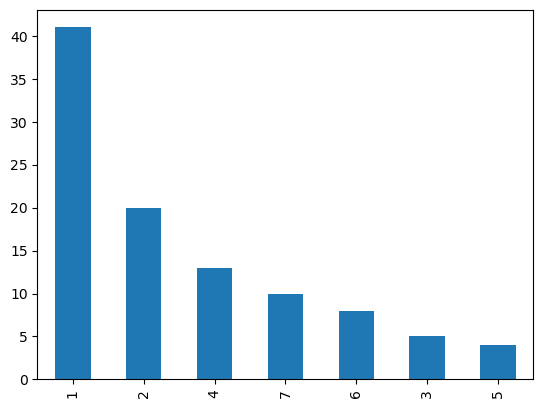

In [14]:
fig,ax=plt.subplots()
(labels.value_counts()).plot(ax=ax,kind='bar')

In [15]:
d.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [16]:
features=d.values[:,:1:-1]
features.shape

(101, 16)

In [17]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model=AgglomerativeClustering(n_clusters=7,linkage='average',affinity='cosine')

In [18]:
model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [20]:
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 1, 6, 4, 4, 3, 0, 1, 2, 3, 3,
       0, 3, 4, 4, 4, 0, 0, 0, 4, 0, 0, 3, 1, 0, 0, 3, 1, 4, 4, 3, 4, 3,
       0, 0, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 3, 3, 3, 3, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 3, 4, 1, 2, 5, 1, 6, 3, 3, 1, 6, 1, 3, 0, 4, 1, 3,
       4, 4, 4, 4, 1, 0, 0, 3, 0, 4, 0, 6, 3], dtype=int64)

In [21]:
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [22]:
labels=labels-1

In [23]:
from sklearn.metrics import mean_squared_error


In [24]:
score=mean_squared_error(labels,model.labels_)

In [25]:
abs_error=np.sqrt(score)
print(abs_error)

1.4487960177299284
